## Workout EDA

#### Importing the modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#### Loading the data


In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Python Class 7-8/data.csv")

#### Data Preparation and Cleaning

In [3]:
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [4]:
df.columns

Index(['Duration', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [5]:
df.info

<bound method DataFrame.info of      Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]>

In [6]:
df.describe

<bound method NDFrame.describe of      Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]>

In [7]:
df.isna().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [8]:
df.dropna(inplace = True)

print(df.to_string())

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.0
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45    105       132     246.0
24         60   

In [9]:
#Replacing the null value with 100
df.fillna(100, inplace = True)


In [10]:
df.isna().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [11]:
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.loc[x, "Duration"] = 90

In [12]:
print(df.duplicated().sum())


7


#### There are total 7 duplicate values

In [13]:
df.drop_duplicates(inplace = True)


In [14]:
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


<Axes: >

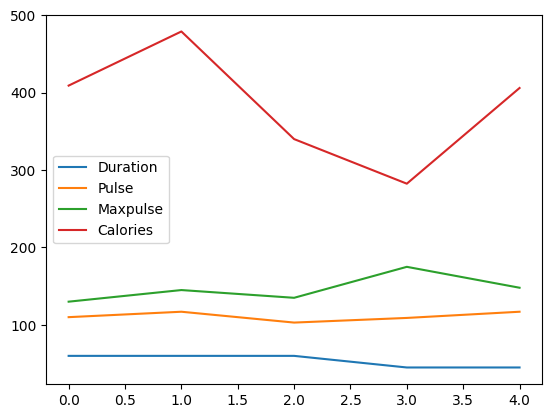

In [15]:
unique_values = df.head()
unique_values.plot()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11280\3720287306.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(


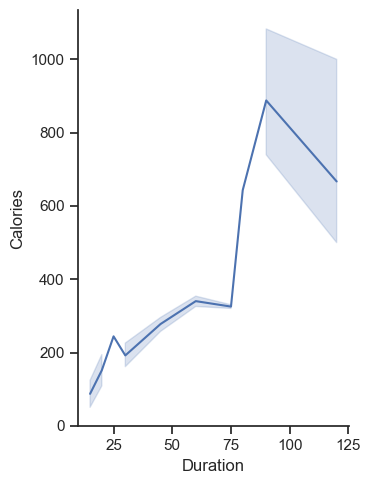

In [16]:
sns.set_theme(style="ticks")


# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=df,
    x="Duration", y="Calories",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11280\1272510398.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


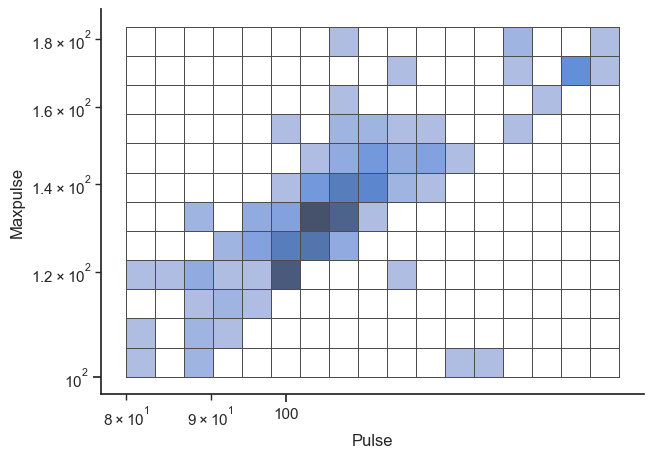

In [17]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="Pulse",y="Maxpulse",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())


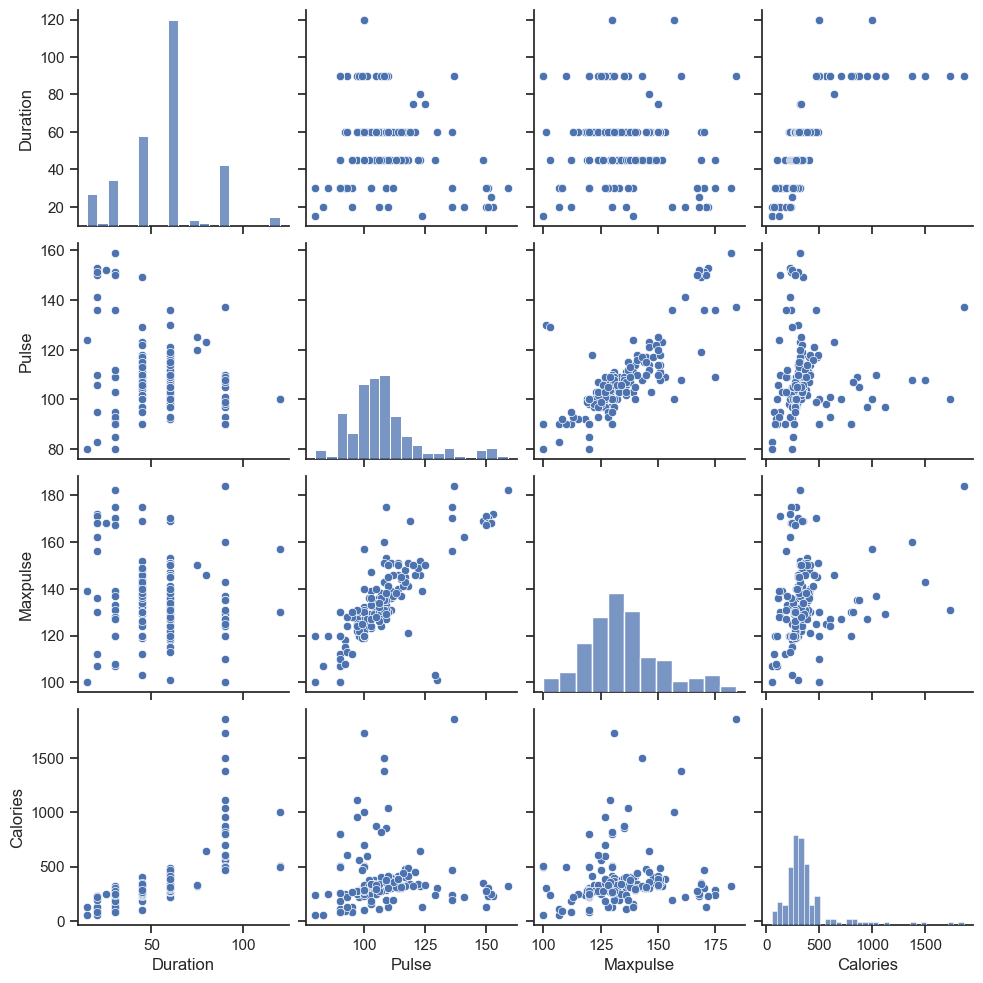

In [18]:
sns.pairplot(df)

In [19]:
unique_duration = df.Duration
unique_duration2 = unique_duration.value_counts()

In [20]:
unique_duration2

60     71
45     31
90     21
30     16
20      9
120     3
15      2
75      2
80      1
25      1
Name: Duration, dtype: int64

<Axes: ylabel='Duration'>

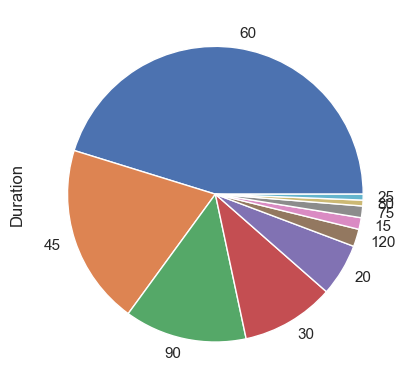

In [21]:
unique_duration2.plot(kind='pie')

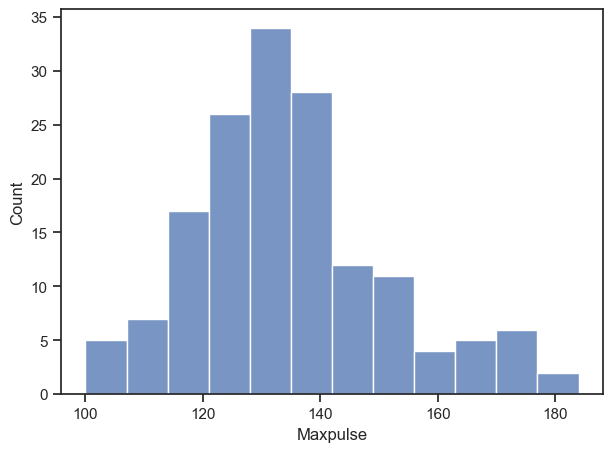

In [22]:
plt.figure(figsize=(7,5))
sns.histplot(df['Maxpulse']);

#### Correaltion Heatmap

In [23]:
corr_hm = df.corr()
corr_hm

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.284359,-0.128065,0.700406
Pulse,-0.284359,1.000000,0.784994,0.015301
Maxpulse,-0.128065,0.784994,1.000000,0.195309
Calories,0.700406,0.015301,0.195309,1.000000


<Axes: >

<Figure size 500x500 with 0 Axes>

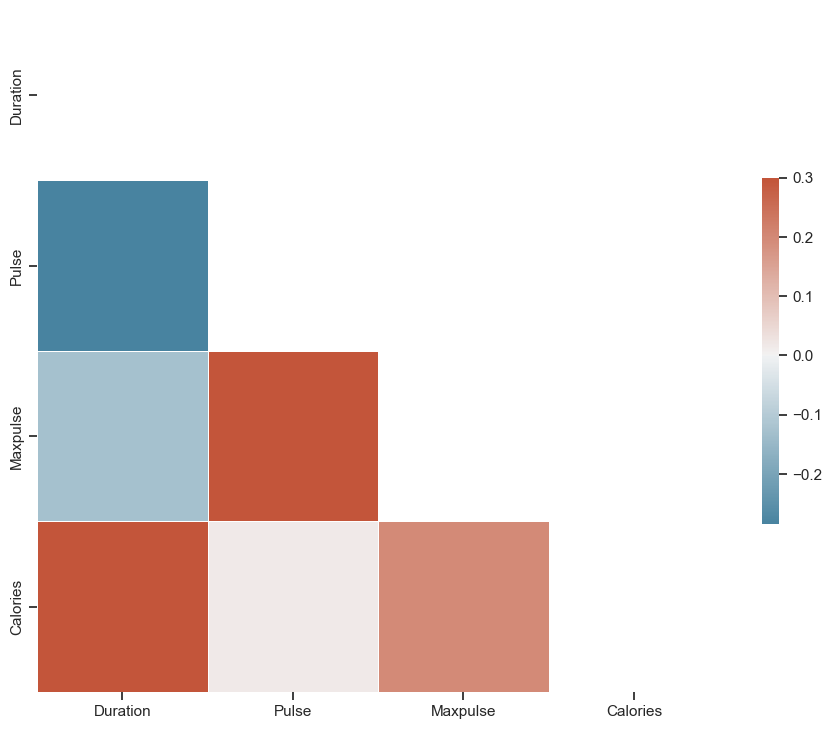

In [24]:
plt.figure(figsize=(5,5))
mask = np.triu(np.ones_like(corr_hm, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_hm, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



<Axes: >

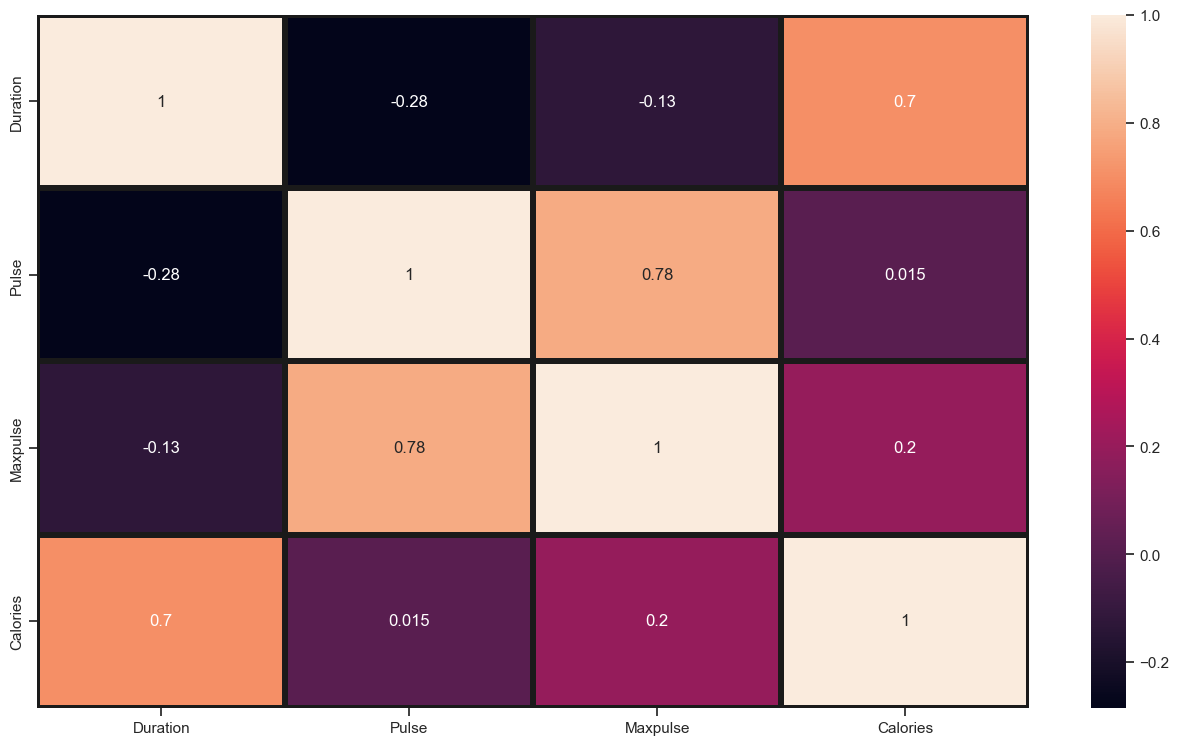

In [25]:
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corr_hm, annot=True, linewidths=4, ax=ax,linecolor="k")